In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

In [13]:
a='Prophet'
b='NP'
c='Silverkite'
d='Orbit'
e='NBeats'

In [14]:
df = pd.read_csv(e+'_results.csv')
df = df.replace(r'^\s*$', np.nan, regex=True)
df['WeeklyRMSE'] = df['WeeklyRMSE'].astype(float)
df.head(10)

,Series,TrendMAE,YearlyMAE,WeeklyMAE,TrendRMSE,YearlyRMSE,WeeklyRMSE
0,S1,0.915264,0.113618,NaN,1.190667,0.113618,NaN
1,S2,1.183655,0.131538,0.009218,1.369680,0.148230,0.010357
2,S3,0.436723,0.133141,0.017689,0.566244,0.148978,0.019594
3,S4,0.209346,0.648100,1.786411,0.236460,0.907455,1.900288
4,S5,1.465196,0.112430,0.311858,1.777325,0.153747,0.343766
5,S6,0.304709,0.033901,0.027361,0.354185,0.048760,0.030763
6,S7,0.318152,0.349024,0.391017,0.369763,0.614493,0.408899


In [15]:
df['MAE_PerSeries']=(df['TrendMAE']+df['YearlyMAE']+df['WeeklyMAE'])/3
df['MAE_PerSeries'][0]=(df['TrendMAE'][0]+df['YearlyMAE'][0])/2

df['RMSE_PerSeries']=(df['TrendRMSE']+df['YearlyRMSE']+df['WeeklyRMSE'])/3
df['RMSE_PerSeries'][0]=(df['TrendRMSE'][0]+df['YearlyRMSE'][0])/2

C:\Users\strub\AppData\Local\Temp\ipykernel_12744\517728261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MAE_PerSeries'][0]=(df['TrendMAE'][0]+df['YearlyMAE'][0])/2
C:\Users\strub\AppData\Local\Temp\ipykernel_12744\517728261.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RMSE_PerSeries'][0]=(df['TrendRMSE'][0]+df['YearlyRMSE'][0])/2


In [16]:
df.head(10)

,Series,TrendMAE,YearlyMAE,WeeklyMAE,TrendRMSE,YearlyRMSE,WeeklyRMSE,MAE_PerSeries,RMSE_PerSeries
0,S1,0.915264,0.113618,NaN,1.190667,0.113618,NaN,0.514441,0.652143
1,S2,1.183655,0.131538,0.009218,1.369680,0.148230,0.010357,0.441470,0.509422
2,S3,0.436723,0.133141,0.017689,0.566244,0.148978,0.019594,0.195851,0.244939
3,S4,0.209346,0.648100,1.786411,0.236460,0.907455,1.900288,0.881286,1.014734
4,S5,1.465196,0.112430,0.311858,1.777325,0.153747,0.343766,0.629828,0.758279
5,S6,0.304709,0.033901,0.027361,0.354185,0.048760,0.030763,0.121990,0.144569
6,S7,0.318152,0.349024,0.391017,0.369763,0.614493,0.408899,0.352731,0.464385


In [176]:
df.to_csv(e+"_results2.csv",index=False)

In [30]:
df_results = pd.DataFrame(columns=['library','MeanTrendMAE', 'MeanWeeklyMAE', 'MeanYearlyMAE', 'MeanSeasonalityMAE', 'MeanMAE', 'MeanTrendRMSE', 'MeanWeeklyRMSE', 'MeanYearlyRMSE','MeanSeasonalityRMSE','MeanRMSE'])
df_results['library']=['prophet','neuralProphet','Greykite','Orbit','NBeats'] 

In [28]:
ind=4

df_results['MeanTrendMAE'][ind]= df['TrendMAE'].mean()
df_results['MeanWeeklyMAE'][ind]= df['WeeklyMAE'].mean()
df_results['MeanYearlyMAE'][ind]= df['YearlyMAE'].mean()
df_results['MeanSeasonalityMAE'][ind]= (df_results['MeanWeeklyMAE'][ind] + df_results['MeanYearlyMAE'][ind])/2
df_results['MeanMAE'][ind]= (df_results['MeanWeeklyMAE'][ind] + df_results['MeanYearlyMAE'][ind]+df_results['MeanTrendMAE'][ind])/3

df_results['MeanTrendRMSE'][ind]= df['TrendRMSE'].mean()
df_results['MeanWeeklyRMSE'][ind]= df['WeeklyRMSE'].mean()
df_results['MeanYearlyRMSE'][ind]= df['YearlyRMSE'].mean()
df_results['MeanSeasonalityRMSE'][ind]= (df_results['MeanWeeklyRMSE'][ind] + df_results['MeanYearlyRMSE'][ind])/2
df_results['MeanRMSE'][ind]= (df_results['MeanWeeklyRMSE'][ind] + df_results['MeanYearlyRMSE'][ind]+df_results['MeanTrendRMSE'][ind])/3

,library,MeanTrendMAE,MeanWeeklyMAE,MeanYearlyMAE,MeanSeasonalityMAE,MeanMAE,MeanTrendRMSE,MeanWeeklyRMSE,MeanYearlyRMSE,MeanSeasonalityRMSE,MeanRMSE
0,prophet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,neuralProphet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Greykite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Orbit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NBeats,0.690435,0.423926,0.217393,0.320659,0.443918,0.837761,0.452278,0.30504,0.378659,0.531693


In [120]:
df_results.to_csv("Mean_Errors.csv",index=False)

In [7]:
df2 = pd.read_csv('Mean_Errors.csv')
df2.head()

,library,MeanTrendMAE,MeanWeeklyMAE,MeanYearlyMAE,MeanSeasonalityMAE,MeanMAE,MeanTrendRMSE,MeanWeeklyRMSE,MeanYearlyRMSE,MeanSeasonalityRMSE,MeanRMSE
0,prophet,0.078212,0.027758,0.104958,0.066358,0.070310,0.095498,0.031668,0.166377,0.099022,0.097847
1,neuralProphet,0.099901,0.029003,0.119087,0.074045,0.082663,0.127679,0.038064,0.251964,0.145014,0.139236
2,Greykite,0.228699,0.209970,0.323390,0.266680,0.254020,0.281088,0.277053,0.397104,0.337078,0.318415
3,Orbit,0.280304,0.140285,0.140391,0.140338,0.186993,0.358228,0.161793,0.204259,0.183026,0.241426
4,NBeats,0.690435,0.423926,0.217393,0.320659,0.443918,0.837761,0.452278,0.305040,0.378659,0.531693


0.3786589851693235

0.3206593949756671

# Grafik anlegen für die MAE per serie

In [17]:
df0 = pd.read_csv(a+'_results2.csv')
df1 = pd.read_csv(b+'_results2.csv')
df2 = pd.read_csv(c+'_results2.csv')
df3 = pd.read_csv(d+'_results2.csv')
df4 = pd.read_csv(e+'_results2.csv')
df0.head()

,Series,TrendMAE,YearlyMAE,WeeklyMAE,TrendRMSE,YearlyRMSE,WeeklyRMSE,MAE_PerSeries,RMSE_PerSeries
0,S1,0.023373,0.024746,NaN,0.030909,0.030012,NaN,0.024059,0.030460
1,S2,0.184467,0.055831,0.019938,0.216664,0.068897,0.021630,0.086746,0.102397
2,S3,0.037751,0.018176,0.037322,0.050227,0.021658,0.050227,0.031083,0.040704
3,S4,0.086745,0.292872,0.045150,0.105088,0.490920,0.025838,0.141589,0.207282
4,S5,0.093039,0.038359,0.013412,0.113494,0.047563,0.014310,0.048270,0.058456


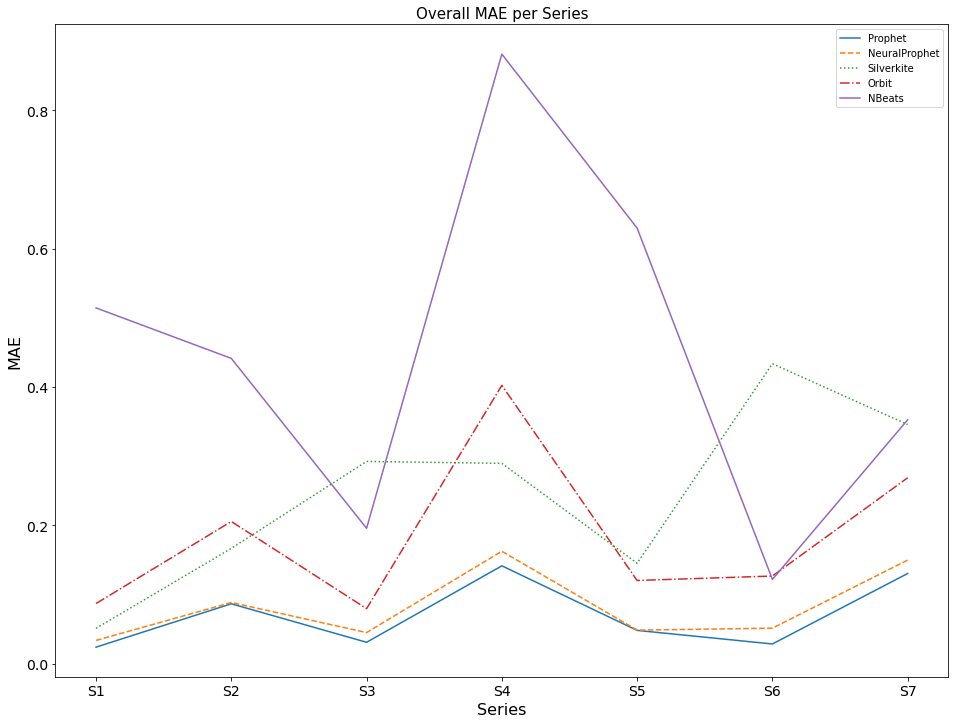

In [18]:
import matplotlib.pyplot as plt 

a1 = df0['MAE_PerSeries']
a2 = df0['Series']
b1 = df1['MAE_PerSeries']
b2 = df1['Series']
c1 = df2['MAE_PerSeries']
c2 = df2['Series']
d1 = df3['MAE_PerSeries']
d2 = df3['Series']
e1 = df4['MAE_PerSeries']
e2 = df4['Series']

plt.plot(a2, a1, label="Prophet" )
plt.plot(b2, b1, label="NeuralProphet", linestyle = 'dashed')
plt.plot(c2, c1, label="Silverkite", linestyle = 'dotted')
plt.plot(d2, d1, label="Orbit", linestyle = 'dashdot')
plt.plot(e2, e1, label="NBeats")


plt.title('Overall MAE per Series' ,fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Series",fontsize=16)
plt.ylabel("MAE",fontsize=16)
plt.legend()
plt.rcParams["figure.figsize"] = (16,12)
#plt.xlim('2018-04-01','2018-04-30')
plt.show()



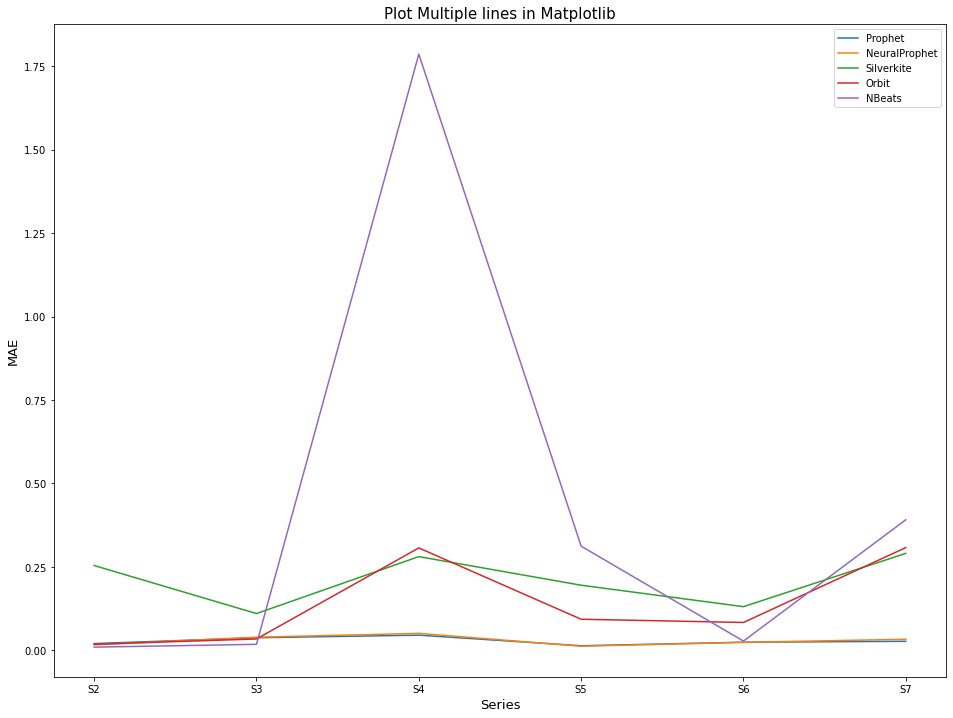

In [30]:
import matplotlib.pyplot as plt 

column = 'WeeklyMAE'

a5 = df0[column]
a6 = df0['Series']
b5 = df1[column]
b6 = df1['Series']
c5 = df2[column]
c6 = df2['Series']
d5 = df3[column]
d6 = df3['Series']
e5 = df4[column]
e6 = df4['Series']

plt.plot(a6, a5, label="Prophet")
plt.plot(b6, b5, label="NeuralProphet")
plt.plot(c6, c5, label="Silverkite")
plt.plot(d6, d5, label="Orbit")
plt.plot(e6, e5, label="NBeats")


plt.title("Plot Multiple lines in Matplotlib",fontsize=15)
plt.xlabel("Series",fontsize=13)
plt.ylabel("MAE",fontsize=13)
plt.legend()
plt.rcParams["figure.figsize"] = (16,12)
#plt.xlim('2018-04-01','2018-04-30')
plt.show()

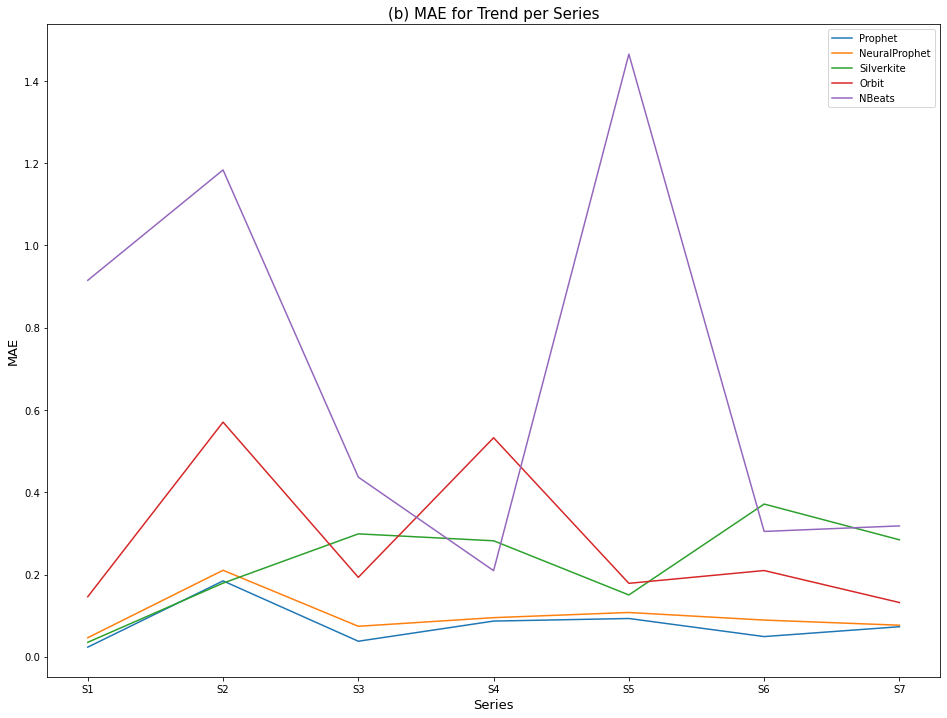

In [25]:
import matplotlib.pyplot as plt 

column = 'TrendMAE'

a3 = df0[column]
a4 = df0['Series']
b3 = df1[column]
b4 = df1['Series']
c3 = df2[column]
c4 = df2['Series']
d3 = df3[column]
d4 = df3['Series']
e3 = df4[column]
e4 = df4['Series']

plt.plot(a4, a3, label="Prophet")
plt.plot(b4, b3, label="NeuralProphet")
plt.plot(c4, c3, label="Silverkite")
plt.plot(d4, d3, label="Orbit")
plt.plot(e4, e3, label="NBeats")


plt.title("(b) MAE for Trend per Series",fontsize=15)
plt.xlabel("Series",fontsize=13)
plt.ylabel("MAE",fontsize=13)
plt.legend()
plt.rcParams["figure.figsize"] = (16,12)
#plt.xlim('2018-04-01','2018-04-30')
plt.show()

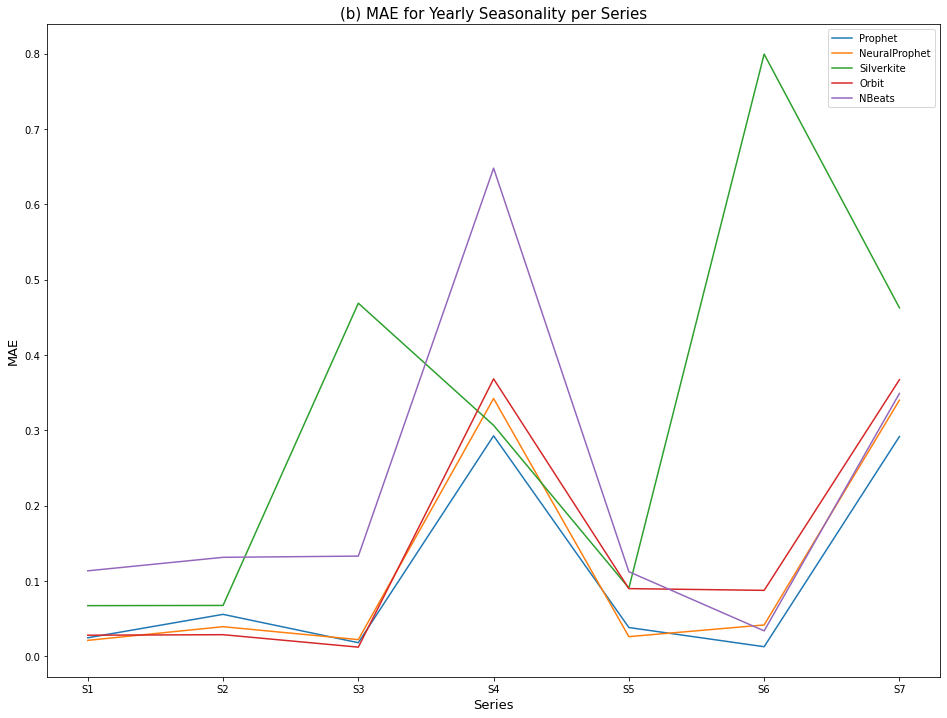

In [31]:
import matplotlib.pyplot as plt 

column = 'YearlyMAE'

a7 = df0[column]
a8 = df0['Series']
b7 = df1[column]
b8 = df1['Series']
c7 = df2[column]
c8 = df2['Series']
d7 = df3[column]
d8 = df3['Series']
e7 = df4[column]
e8 = df4['Series']

plt.plot(a8, a7, label="Prophet")
plt.plot(b8, b7, label="NeuralProphet")
plt.plot(c8, c7, label="Silverkite")
plt.plot(d8, d7, label="Orbit")
plt.plot(e8, e7, label="NBeats")


plt.title("(b) MAE for Yearly Seasonality per Series",fontsize=15)
plt.xlabel("Series",fontsize=13)
plt.ylabel("MAE",fontsize=13)
plt.legend()
plt.rcParams["figure.figsize"] = (16,12)
#plt.xlim('2018-04-01','2018-04-30')
plt.show()

C:\Users\strub\AppData\Local\Temp\ipykernel_12744\202130277.py:79: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig("MAEperSeries2.pdf")
C:\Users\strub\AppData\Local\Temp\ipykernel_12744\202130277.py:79: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig("MAEperSeries2.pdf")
C:\Users\strub\anaconda3\envs\prophet39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


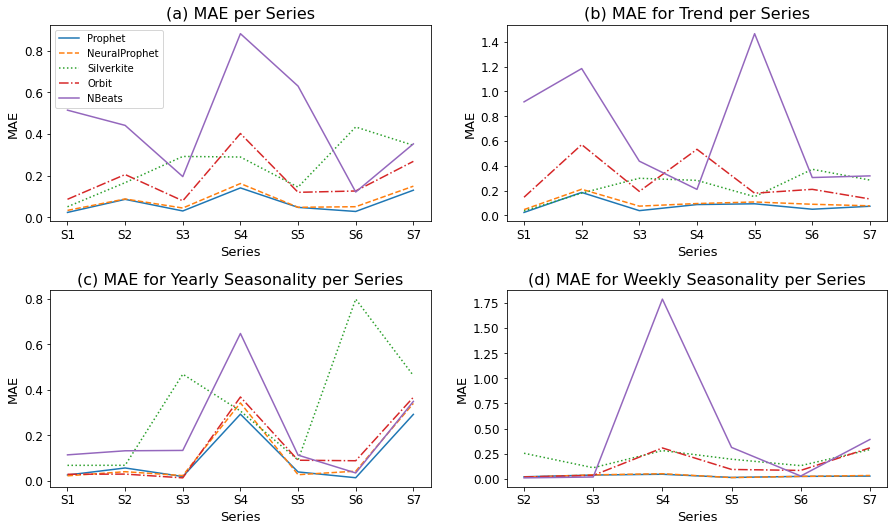

In [58]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib as mpl


fig = plt.figure(constrained_layout=True, figsize=(15, 8.5))
spec = mpl.gridspec.GridSpec(ncols=2, nrows=2)
spec.update(wspace=0.2, hspace=0.35)


ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[1,0])
ax4 = fig.add_subplot(spec[1,1])

l1 = ax1.plot(a2, a1, label="Prophet" )
l2 = ax1.plot(b2, b1, label="NeuralProphet", linestyle = 'dashed')
l4 = ax1.plot(c2, c1, label="Silverkite", linestyle = 'dotted')
l5 = ax1.plot(d2, d1, label="Orbit", linestyle = 'dashdot')
l6 = ax1.plot(e2, e1, label="NBeats")
ax1.set_title('(a) MAE per Series', fontsize=16)
ax1.set_xlabel("Series",fontsize=13)
ax1.set_ylabel("MAE",fontsize=13)
#ax1.set(xlabel='date', ylabel='values')
#ax1.set_xlabel('date', fontsize=14)
#ax1.set_ylabel('values', fontsize=14)
#ax1.set_ylim([-3,3])
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax1.legend( loc='upper left')


ax2.plot(a4, a3, label="Prophet" )
ax2.plot(b4, b3, label="NeuralProphet", linestyle = 'dashed')
ax2.plot(c4, c3, label="Silverkite", linestyle = 'dotted')
ax2.plot(d4, d3, label="Orbit", linestyle = 'dashdot')
ax2.plot(e4, e3, label="NBeats")
ax2.set_title('(b) MAE for Trend per Series', fontsize=16)
ax2.set_xlabel("Series",fontsize=13)
ax2.set_ylabel("MAE",fontsize=13)
#ax1.set(xlabel='date', ylabel='values')
#ax1.set_xlabel('date', fontsize=14)
#ax1.set_ylabel('values', fontsize=14)
#ax1.set_ylim([-3,3])
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=12)


ax3.plot(a8, a7, label="Prophet" )
ax3.plot(b8, b7, label="NeuralProphet", linestyle = 'dashed')
ax3.plot(c8, c7, label="Silverkite", linestyle = 'dotted')
ax3.plot(d8, d7, label="Orbit", linestyle = 'dashdot')
ax3.plot(e8, e7, label="NBeats")
ax3.set_title('(c) MAE for Yearly Seasonality per Series', fontsize=16)
ax3.set_xlabel("Series",fontsize=13)
ax3.set_ylabel("MAE",fontsize=13)
#ax1.set(xlabel='date', ylabel='values')
#ax1.set_xlabel('date', fontsize=14)
#ax1.set_ylabel('values', fontsize=14)
#ax1.set_ylim([-3,3])
ax3.xaxis.set_tick_params(labelsize=12)
ax3.yaxis.set_tick_params(labelsize=12)

ax4.plot(a6, a5, label="Prophet" )
ax4.plot(b6, b5, label="NeuralProphet", linestyle = 'dashed')
ax4.plot(c6, c5, label="Silverkite", linestyle = 'dotted')
ax4.plot(d6, d5, label="Orbit", linestyle = 'dashdot')
ax4.plot(e6, e5, label="NBeats")
ax4.set_title('(d) MAE for Weekly Seasonality per Series', fontsize=16)
ax4.set_xlabel("Series",fontsize=13)
ax4.set_ylabel("MAE",fontsize=13)
#ax1.set(xlabel='date', ylabel='values')
#ax1.set_xlabel('date', fontsize=14)
#ax1.set_ylabel('values', fontsize=14)
#ax1.set_ylim([-3,3])
ax4.xaxis.set_tick_params(labelsize=12)
ax4.yaxis.set_tick_params(labelsize=12)

plt.savefig("MAEperSeries2.pdf") 
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)

#plt.figlegend((l1,l2,l4,l5,l6), ("Prophet","NeuralProphet","Silverkite","Orbit","NBeats"), loc = 'lower center', ncol=5, labelspacing=0.)

# Grafik für DurchschnittsMAE im Vergleich

In [42]:
df_results = pd.read_csv('Mean_Errors.csv')
df_results.head()

,library,MeanTrendMAE,MeanWeeklyMAE,MeanYearlyMAE,MeanSeasonalityMAE,MeanMAE,MeanTrendRMSE,MeanWeeklyRMSE,MeanYearlyRMSE,MeanSeasonalityRMSE,MeanRMSE
0,Prophet,0.078212,0.027758,0.104958,0.066358,0.070310,0.095498,0.031668,0.166377,0.099022,0.097847
1,NeuralProphet,0.099901,0.029003,0.119087,0.074045,0.082663,0.127679,0.038064,0.251964,0.145014,0.139236
2,Silverkite,0.228699,0.209970,0.323390,0.266680,0.254020,0.281088,0.277053,0.397104,0.337078,0.318415
3,Orbit,0.280304,0.140285,0.140391,0.140338,0.186993,0.358228,0.161793,0.204259,0.183026,0.241426
4,NBeats,0.690435,0.423926,0.217393,0.320659,0.443918,0.837761,0.452278,0.305040,0.378659,0.531693


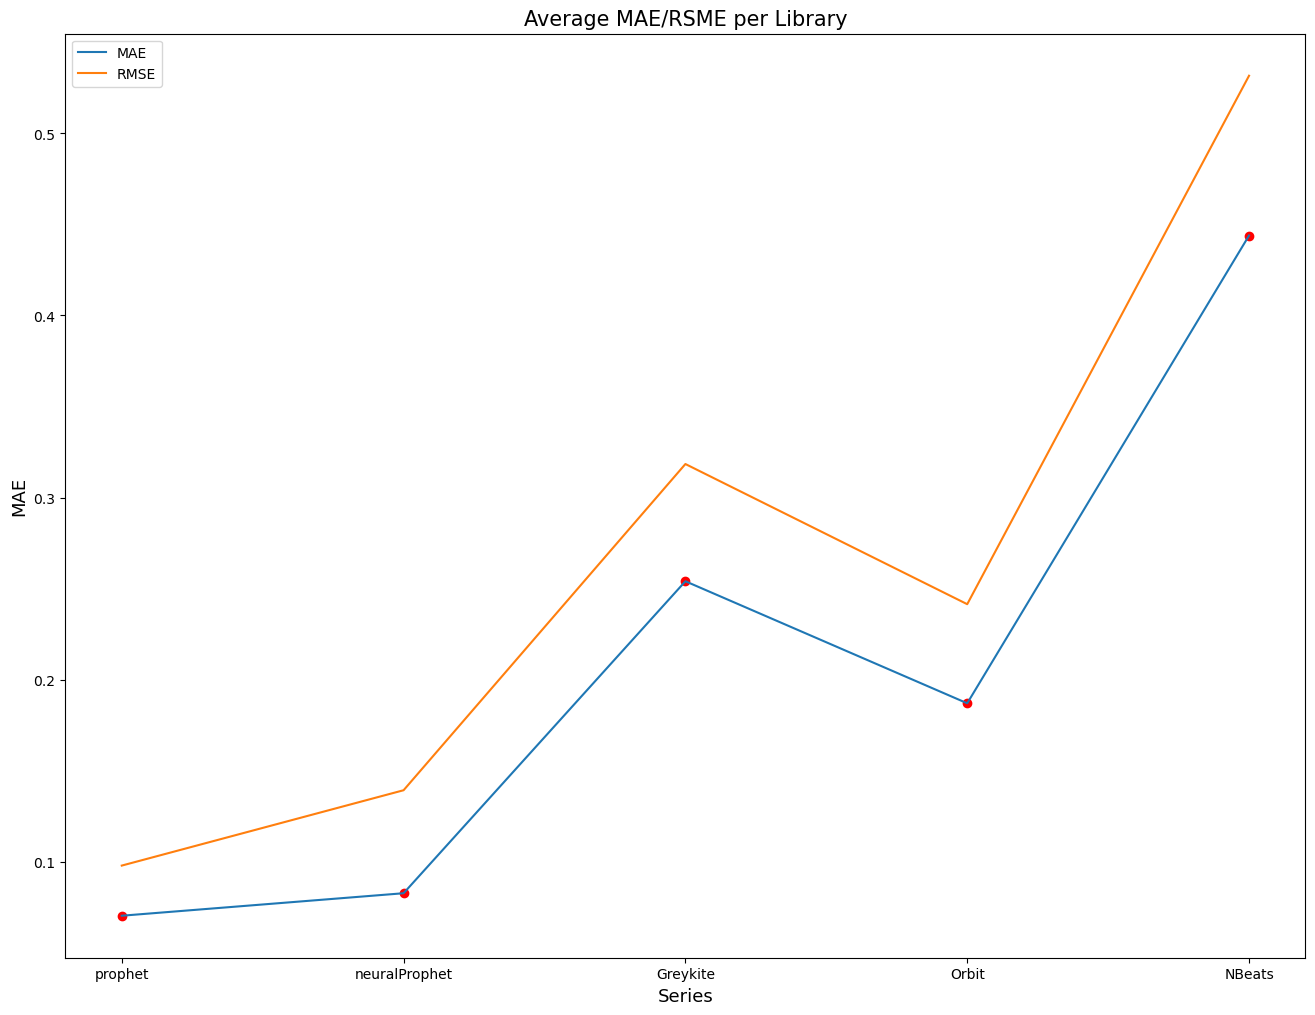

In [225]:
import matplotlib.pyplot as plt 

a2=df_results['library']
a1=df_results['MeanMAE']

b2=df_results['library']
b1=df_results['MeanRMSE']

plt.plot(a2, a1, label= 'MAE')
plt.plot(b2, b1, label= 'RMSE')
plt.scatter(a2, a1, color='red')
plt.title("Average MAE/RSME per Library",fontsize=15)
plt.xlabel("Series",fontsize=13)
plt.ylabel("MAE",fontsize=13)
plt.legend()
plt.rcParams["figure.figsize"] = (16,12)
#plt.xlim('2018-04-01','2018-04-30')
plt.show()

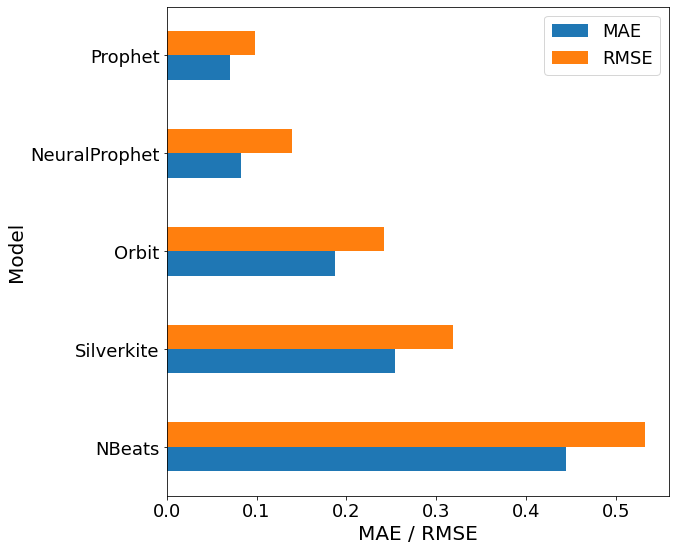

In [59]:
df_neu = pd.DataFrame(columns=['MAE', 'RMSE']) 
df_neu.MAE = df_results['MeanMAE'] 
df_neu.RMSE = df_results['MeanRMSE']
df_neu.index=df_results['library']
df_neu.sort_values(['MAE'],  ascending = False,  inplace = True, )
#print(df_neu.head())

  
df_neu.plot(kind="barh") 
plt.ylabel("Model",fontsize=20)
plt.xlabel("MAE / RMSE",fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(prop={'size': 18})
plt.rcParams["figure.figsize"] = (9,9)

plt.savefig('MAE_PerModel_bar3.png', bbox_inches='tight')